# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from src.numpy_encode import *
from src.utils.file_processing import process_all, process_file
from src.config import *
from src.music_transformer import *

In [4]:
data_path = Path('data')

# Location of your midi files
midi_path = data_path/'midi'
midi_path.mkdir(parents=True, exist_ok=True)

# Location of transformed midi to numpy dataset
numpy_path = data_path/'numpy'
numpy_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save.pkl'

## Fastai Learner

In [5]:
data = load_data(numpy_path, data_save_name)
vocab = data.vocab

## Load Model

In [17]:
# Download pretrained model if you haven't already
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained'
pretrained_path = untar_data(pretrained_url, dest=numpy_path)
load_path = pretrained_path/'MusicTransformer.pth'; load_path

PosixPath('data/numpy/pretrained/MusicTransformer.pth')

In [18]:
config = default_config()
learn = music_model_learner(data, config.copy(), pretrained_path=load_path)

## Prediction

In [19]:
data_dir = 'data/midi/examples/'

In [20]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files[:4]

[PosixPath('data/midi/examples/Levels - Avicii - Verse.mid'),
 PosixPath('data/midi/examples/Colors Of The Wind - Disney - Chorus.mid'),
 PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid'),
 PosixPath('data/midi/examples/La Bamba - Ritchie Valen - Chorus.mid')]

In [21]:
idx = 2
f = midi_files[idx]; f

PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid')

### Encode the song and trim to seed length

In [22]:
cutoff_beat = 10

item = MusicItem.from_file(f, data.vocab)
seed_item = item.trim_to_beat(cutoff_beat)

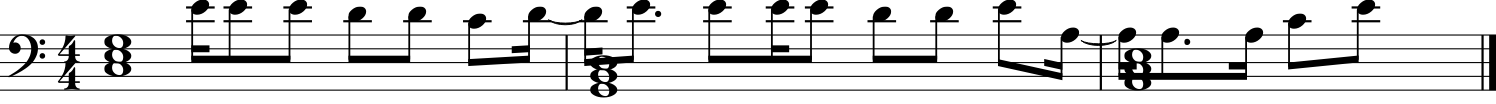

In [23]:
seed_item.show()

In [24]:
seed_item.play()

In [25]:
pred = learn.predict(seed_item, n_words=400, temperatures=(1.1,0.4), min_bars=12, top_k=24, top_p=0.7)

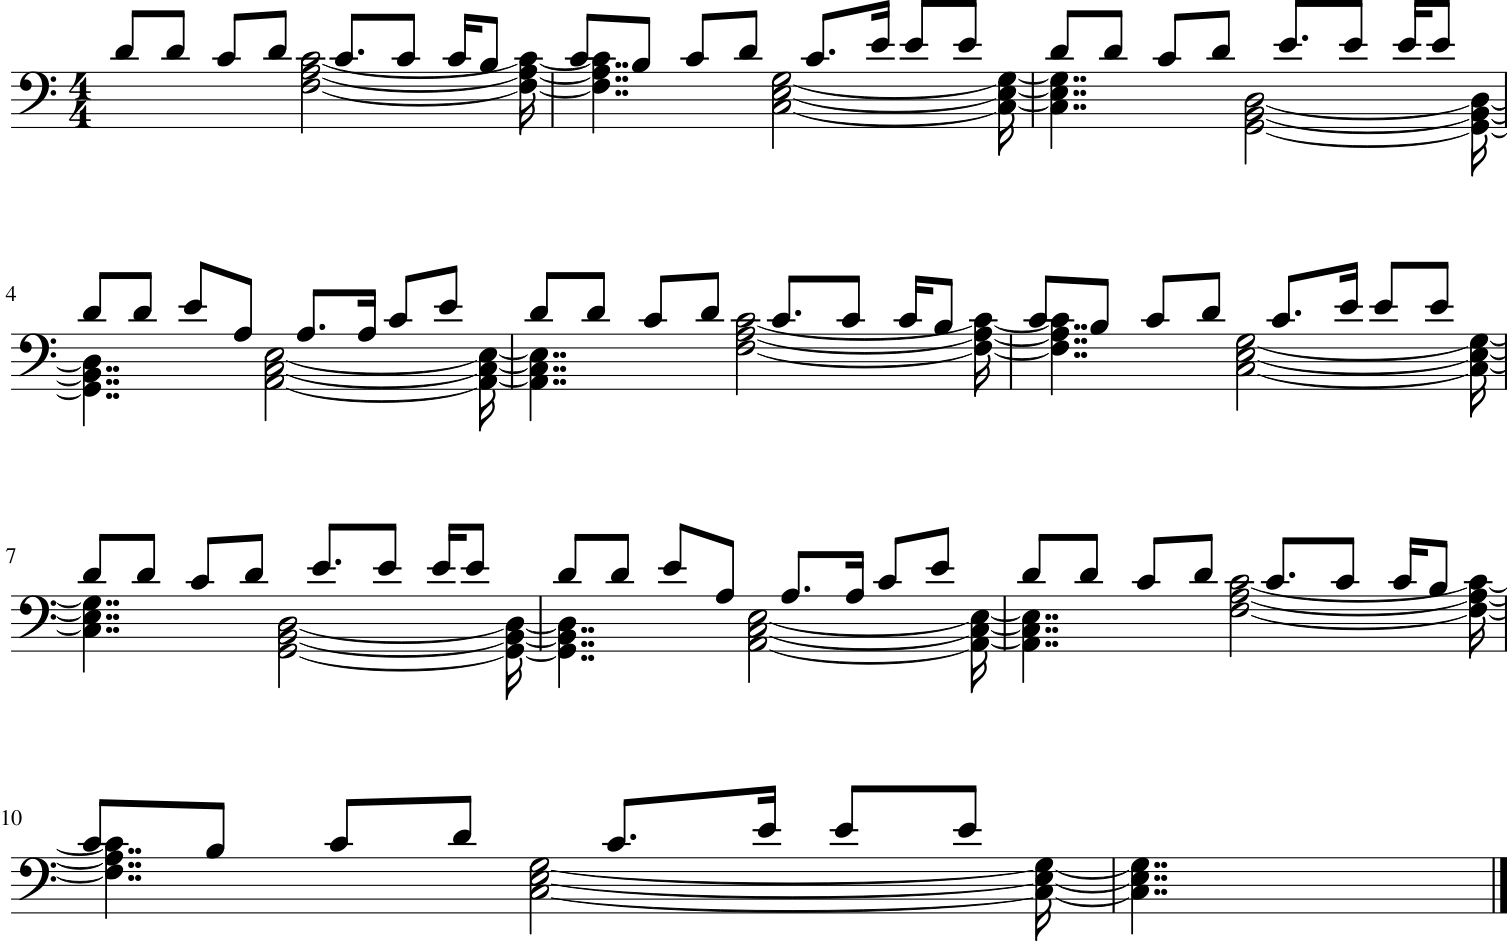

In [26]:
pred.show()

In [27]:
pred.play()